In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc

In [2]:
conn = pyodbc.connect(
    "Driver={SQL Server Native Client 11.0};"
    "Server=DESKTOP-SCDT9OL\SQLEXPRESS;"
    "Database=RepuestosWeb;"
    "Trusted_Connection=yes"
)

In [11]:
pcp_psc = pd.read_sql("select DATEDIFF(YEAR, C.Fechanacimiento, GETDATE()) as Edad, DO.Cantidad, C.FechaNacimiento "
+ "from Clientes C inner join orden o on (c.ID_cliente = o.ID_Cliente) "
+ "inner join Detalle_orden do on (o.ID_Orden = DO.ID_Orden) ",conn)
pcp_psc.head(10)

,Edad,Cantidad,FechaNacimiento
0,24.0,1,1997-07-28 15:20:59.940
1,NaN,7,NaT
2,24.0,12,1997-11-08 21:12:26.020
3,45.0,3,1976-10-08 14:37:00.270
4,44.0,12,1977-09-28 15:10:25.260
5,23.0,2,1998-05-28 23:12:11.120
6,55.0,6,1966-04-24 15:23:46.450
7,37.0,9,1984-05-13 22:38:36.260
8,17.0,10,2004-09-01 02:34:48.840
9,31.0,2,1990-12-22 14:24:49.070


In [12]:
pcp_psc['FechaNacimiento'] = pd.to_datetime(pcp_psc['FechaNacimiento'])
pcp_psc.set_index('FechaNacimiento',inplace=True)

In [13]:
pcp_mensual = pcp_psc.resample('M').sum()

Text(0.5, 1.0, 'Presipitación diaria mm/dd')

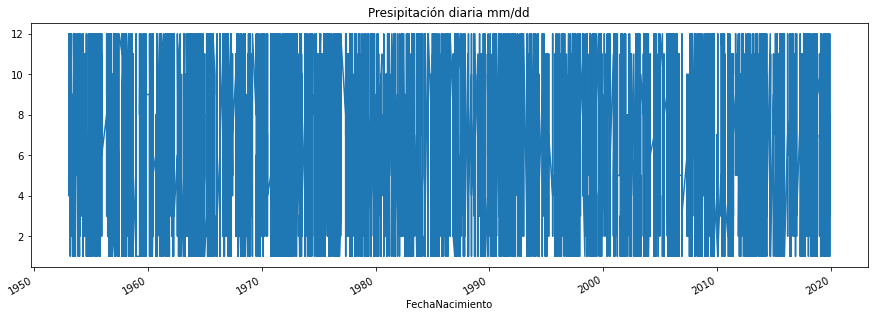

In [18]:
#Grafico de presipitación diaria
pcp_psc['Cantidad'].plot(figsize=(15,5)).set_title('Presipitación diaria mm/dd')

Text(0.5, 1.0, 'Presipitación Mensual')

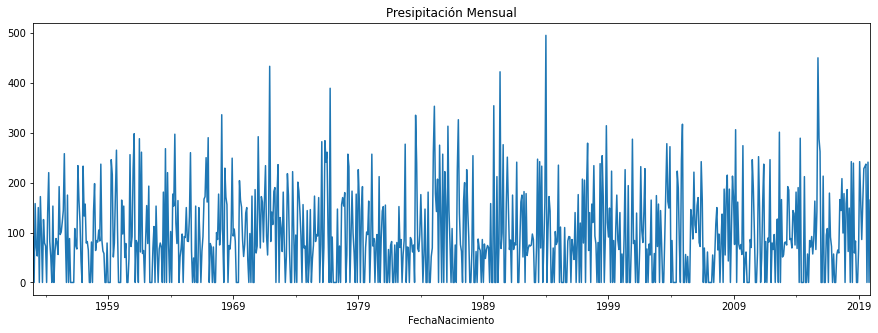

In [17]:
#Grafico de presipitación mensual
pcp_mensual['Cantidad'].plot(figsize=(15,5)).set_title('Presipitación Mensual')